In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start  = '2014-01-01'
end  = '2024-12-31'


stock = 'GOOG'
data = yf.download(stock, start ,end)

[*********************100%***********************]  1 of 1 completed


In [3]:
data 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,27.782366,27.839401,27.603037,27.724083,27.656164,73129082
2014-01-03,27.770908,27.818977,27.520098,27.521841,27.454418,66917888
2014-01-06,27.721344,27.867046,27.557707,27.828691,27.760517,71037271
2014-01-07,28.019974,28.385853,27.924334,28.365179,28.295689,102486711
2014-01-08,28.543015,28.575891,28.226450,28.424210,28.354576,90036218
...,...,...,...,...,...,...
2024-09-12,154.809998,155.610001,153.500000,155.539993,155.539993,21024100
2024-09-13,156.362000,159.274994,156.110001,158.369995,158.369995,16733900
2024-09-16,158.330002,159.240005,157.610001,158.990005,158.990005,14157600


In [4]:
ma_100_days = data.Close.rolling(100).mean()
ma_200_days = data.Close.rolling(200).mean

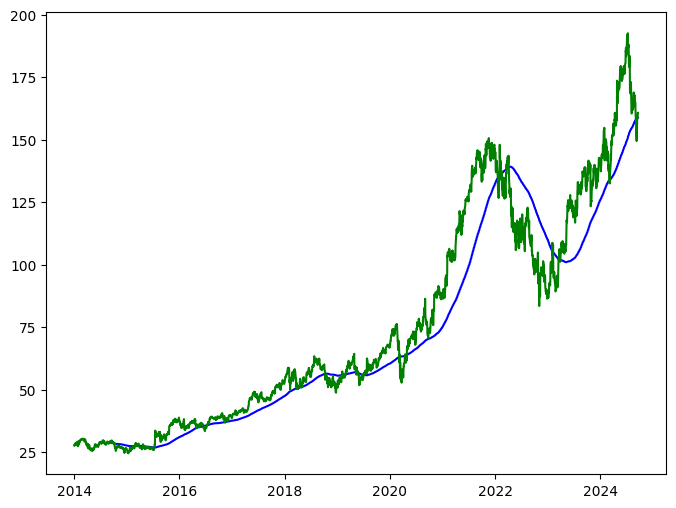

In [5]:
plt.figure(figsize=(8,6))
plt.plot(ma_200_days(), 'b')
plt.plot(data.Close, 'g')

plt.show()

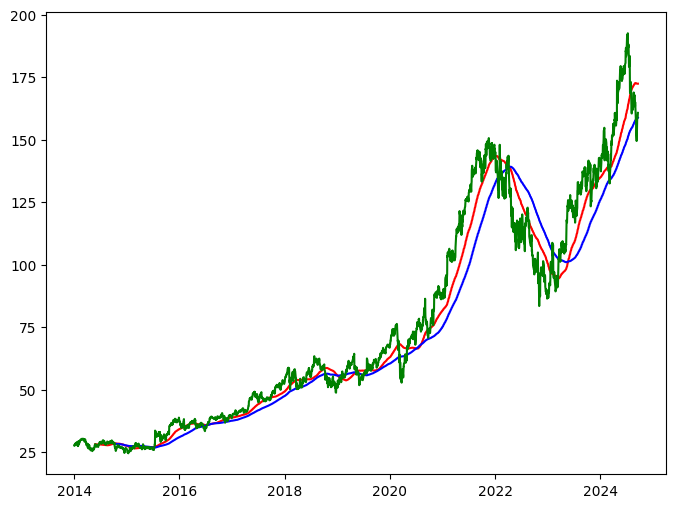

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days(), 'b')
plt.plot(data.Close, 'g')
plt.show()

In [7]:

data.dropna(inplace=True)

In [8]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])


In [9]:
data_train.shape[0], data_test.shape[0]

(2156, 540)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [11]:
data_train_scale = scaler.fit_transform(data_train)

In [12]:
10,11,12,15,16,17,18,19,20,17,18

(10, 11, 12, 15, 16, 17, 18, 19, 20, 17, 18)

In [13]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [14]:
x ,y = np.array(x) , np.array(y)

In [15]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [16]:
model = Sequential()
model.add(LSTM(units=50, activation='relu',return_sequences= True,input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='relu', return_sequences= True ))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences= True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units= 1))

c:\Users\bnadi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(optimizer= 'adam' , loss='mean_squared_error')

In [18]:
model.fit(x,y, epochs=50, batch_size=32, verbose= 1)

Epoch 1/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - loss: 0.0634
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0080
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0048
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0049
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0050
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0048
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0042
Epoch 8/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0041
Epoch 9/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0040
Epoch 10/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0043
Epoch 11/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0039
Epoch 12/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0040
Epoch 13/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0037
Epoch 14/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0034
Epoch 15/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0045
Epoc

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        41,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 507,365 (1.94 MB)

 Trainable params: 169,121 (660.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 338,244 (1.29 MB)

In [20]:
past_100_days = data_train.tail(100)

In [21]:
data_test = pd.concat([past_100_days, data_test],ignore_index=True)
data_test

,Close
0,134.307999
1,132.121994
2,126.464500
3,127.278503
4,133.865997
...,...
635,155.539993
636,158.369995
637,158.990005
638,160.279999


In [22]:
data_test_scale = scaler.fit_transform(data_test)

In [23]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x , y = np.array(x), np.array(y)

In [24]:
y_predict  = model.predict(x)
y_predict


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


array([[0.26637083],
       [0.26357302],
       [0.2608166 ],
       [0.2585654 ],
       [0.25709182],
       [0.2565812 ],
       [0.25725543],
       [0.2589953 ],
       [0.26173413],
       [0.26528075],
       [0.26935726],
       [0.2738632 ],
       [0.27871704],
       [0.28384382],
       [0.28920594],
       [0.29472452],
       [0.30012372],
       [0.30516416],
       [0.30947518],
       [0.31257156],
       [0.3140331 ],
       [0.31376317],
       [0.31214583],
       [0.30937916],
       [0.30550033],
       [0.3005033 ],
       [0.29455507],
       [0.28801888],
       [0.28123587],
       [0.27453485],
       [0.26822406],
       [0.26267186],
       [0.2579405 ],
       [0.25409415],
       [0.25095308],
       [0.24827835],
       [0.24590456],
       [0.2436343 ],
       [0.24136603],
       [0.23903804],
       [0.23675391],
       [0.23450077],
       [0.23226638],
       [0.23008355],
       [0.22779901],
       [0.2252062 ],
       [0.22223128],
       [0.218

In [25]:
scale = 1/scaler.scale_

In [26]:
y_predict = y_predict*scale

In [27]:
y = y*scale


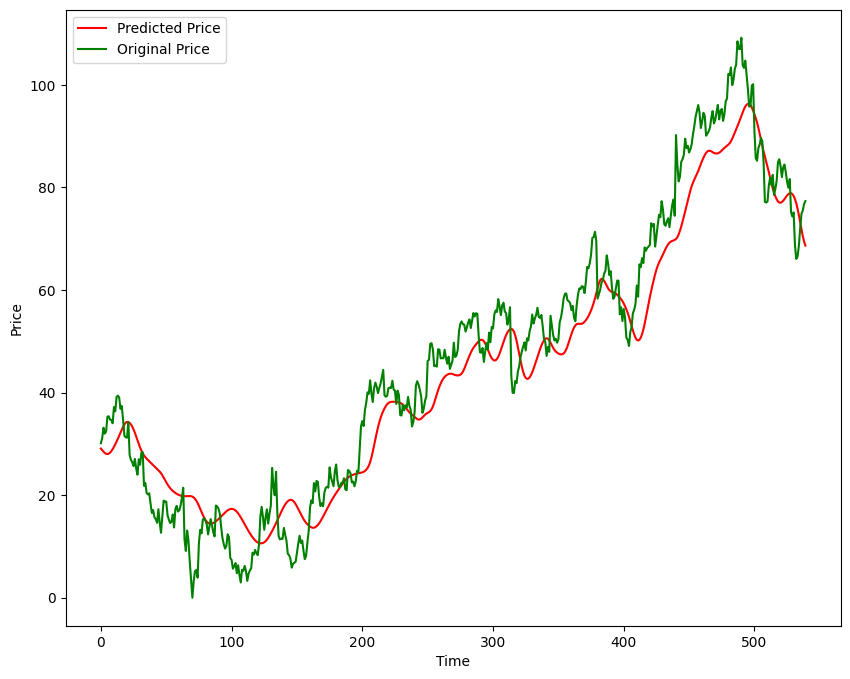

In [28]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r',label = 'Predicted Price')
plt.plot(y,'g',label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
model.save('Stock Prediction Model.keras')